## Observations

* Capomulin and Ramicane seem to be the most effective treatments in terms of tumor volume, showing the greatest reduction in tumor volume over time.

* Mouse weight and tumor volume seeem to be positively related on Capomulin, with a correlation coefficient of 0.84. The heavier mice tend to have greater tumor volumes.

* The number of timepoints for Capomulin and Ramicane also seem to have a positive effect on number of surviving mice.  Given similar numbers of mice treated on each drug, there are noticeably more timepoints for those two, indicating more mice making it through the end of the study.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Merge the data and see if there are any duplicates of Mouse ID and Timepoints:

# Initial merge:
raw_merge = pd.merge(study_results,mouse_metadata, on="Mouse ID", how = "outer")
#raw_merge.head()

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint:
duplicate_mouse = raw_merge.loc[raw_merge.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
print(f"The Duplicate Mouse ID is {duplicate_mouse}")
# Dupliate Mouse ID = g989

The Duplicate Mouse ID is ['g989']


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID:
merged_data = raw_merge.loc[raw_merge['Mouse ID'].isin(duplicate_mouse) == False]
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Checking the number of unique mice in the clean DataFrame:
count = merged_data["Mouse ID"].value_counts()
#count
print(f" The number of unique mice is {len(count)}")
# 248 unique mice (was originally 249)

 The number of unique mice is 248


 ## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Grab the columns we need:
tumor_table = merged_data[["Drug Regimen", "Tumor Volume (mm3)"]]
#tumor_table.head()

# Group for finding median: (Ask Tom in next class if this is needed or if it finds the median anyway)
tumor_table = tumor_table.sort_values(by=["Drug Regimen", "Tumor Volume (mm3)"])
#tumor_table.head()

# Group by and calculate the different stats:
tumor_stats = tumor_table.groupby(["Drug Regimen"]).mean()
tumor_stats["Median"] = tumor_table.groupby(["Drug Regimen"]).median()
tumor_stats["Variance"] = tumor_table.groupby(["Drug Regimen"]).var()
tumor_stats["Standard Deviation"] = tumor_table.groupby(["Drug Regimen"]).std()
tumor_stats["SEM"] = tumor_table.groupby(["Drug Regimen"]).sem()
# tumor_stats

# Rename Mean column:
tumor_stats = tumor_stats.rename(columns = {"Tumor Volume (mm3)": "Mean"})
tumor_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Using the aggregation method, produce the same summary statistics in a single line

# Agg method:
tumor_agg_table = tumor_table.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
tumor_agg_table

#### 10/8 note: That was much quicker than the first method. ####
### Keep this for later, would have helped in previous project. ###

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

##  Bar and Pie Charts

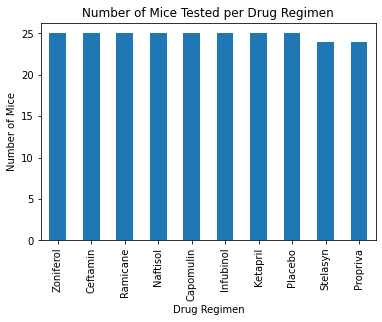

In [8]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Get the two columns we need:
mouse_table = merged_data[["Mouse ID", "Drug Regimen"]]
#mouse_table

# Get the table of unique mice per drug by dropping duplicates of their IDs:
unique_mouse_table = mouse_table.drop_duplicates(["Mouse ID"])
#unique_mouse_table

# Get the counts per drug regimen:
mouse_count_data = pd.DataFrame(unique_mouse_table["Drug Regimen"].value_counts())
#mouse_count_data.head(10)

# Make a bar plot using pandas:
mouse_panda_plot = mouse_count_data.plot.bar(title="Number of Mice Tested per Drug Regimen", legend=False)
mouse_panda_plot.set_xlabel("Drug Regimen")
mouse_panda_plot.set_ylabel("Number of Mice")
#plt.tight_layout()
plt.show()

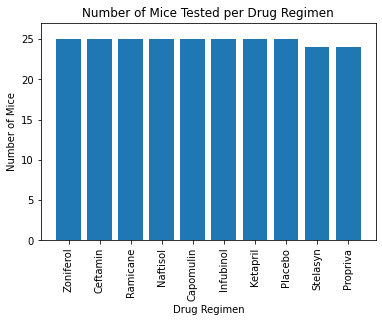

In [30]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Reset the index for py_bar_data:
py_bar_data = mouse_count_data.reset_index(drop=False)
#py_bar_data

# Rename the columns:
py_bar_data = py_bar_data.rename(columns = {"index": "Drug", "Drug Regimen": "Mice Count"})
#py_bar_data

# Make the plot:
plt.bar(py_bar_data["Drug"], py_bar_data["Mice Count"])

# Formatting:
plt.title("Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.ylim(0, 27)
plt.xticks(rotation = "vertical")
plt.show()

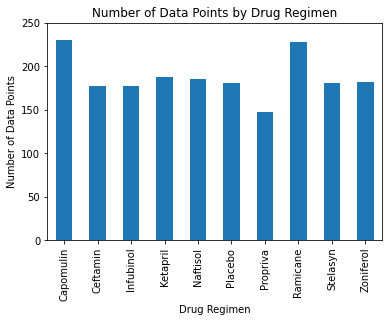

In [31]:
# Note: There was some confusion about part of the assignment, regarding the plots 
# "that shows  the number of total mice for each treatment regimen throughout the course of the study."
# Weren't sure if that just meant number of mice tested per drug, or the number of timepoints per drug throughout the study.
# The above plots are for the former, the below are for the latter.

# Plotting the number of timepoints per drug regimen:

# Generate a bar plot showing number of data points for each treatment regimen using pandas
time_points = merged_data.groupby(["Drug Regimen"])["Timepoint"].count()

# Formatting, Column Renaming, Sorting etc
time_points = pd.DataFrame(time_points)

# Display the results
ax = time_points.plot.bar(title="Number of Data Points by Drug Regimen", legend = False)
ax.set_ylim([0, 250])
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Data Points")

# Show the chart
plt.show()

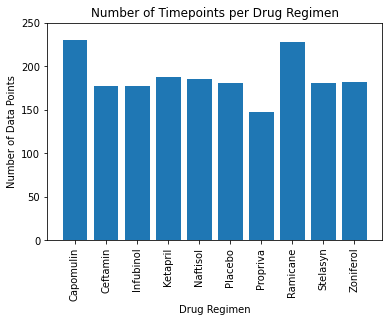

In [29]:
# Plotting Data Points per Drug Regimen with pyplot:

data_points = time_points.reset_index()
#data_points

# Make the plot:
plt.bar(data_points["Drug Regimen"], data_points["Timepoint"])

# Formatting:
plt.title("Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.ylim(0, 250)
plt.xticks(rotation = "vertical")
plt.show()

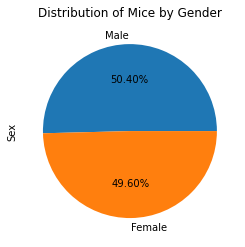

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create a df of unique mice IDs out of the whole merged_data, dropping duplicates by Mouse ID:
unique_merged_data = pd.DataFrame(merged_data)
unique_merged_data = unique_merged_data.drop_duplicates(["Mouse ID"])
#unique_merged_data

# Generate pie chart and format:
gender_count = unique_merged_data["Sex"].value_counts()
gender_graph = gender_count.plot(kind = "pie", autopct = "%1.2f%%")
gender_graph.set_title("Distribution of Mice by Gender")
plt.show()

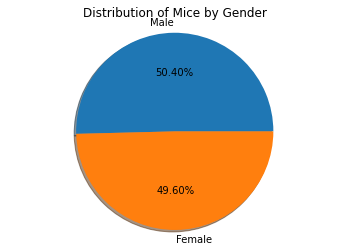

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Re-Show the counts:
#gender_count
#Male: 125
#Female: 123

# Use method from Stu_PyPies exercise in class #2:
genders = ["Male", "Female"]
counts = [125, 123]
plt.pie(counts, labels = genders, autopct="%1.2f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.title("Distribution of Mice by Gender")
plt.show()

 ## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (max) timepoint for each mouse:
mouse_group = merged_data.groupby("Mouse ID")
max_timepoint = mouse_group["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint:
tumor_merge = pd.merge(max_timepoint, merged_data, how = "left", on = ["Mouse ID", "Timepoint"])
tumor_merge                       

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels):
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting):
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers: 
# Locate the rows which contain mice on each drug and get the tumor volumes:
for drug in treatments_list:
    tumors = tumor_merge.loc[tumor_merge["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol_list.append(tumors)
    
    quartiles = tumors.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

# Determine outliers using upper and lower bounds:
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    tumor_outliers = tumors.loc[(tumors < lower_bound) | (tumors > upper_bound)]
    
    if (tumor_outliers.sum() > 0):
        print(f"{drug} has outliers: {tumor_outliers}")
    else:
        print(f"{drug} shows no outliers.")

#Calculations for quartiles from Lesson 3:
#quartiles = temperatures.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")
#outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
#outlier_occupancy

Capomulin shows no outliers.
Ramicane shows no outliers.
Infubinol has outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin shows no outliers.


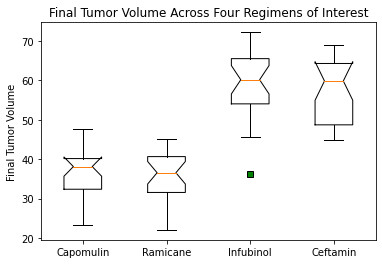

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest.

# Plotting and formatting:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume Across Four Regimens of Interest")
ax1.boxplot(tumor_vol_list, treatments_list, showfliers = True, flierprops = {'markerfacecolor': 'g', 'marker': 's'})
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
ax1.set_ylabel("Final Tumor Volume")

plt.show()

# Note: It appears these are showing up as "notched" box plots.  Have searched a bunch, but can't find how to change that.
# Setting notch=None above breaks it / causes error.

##  Line and Scatter Plots

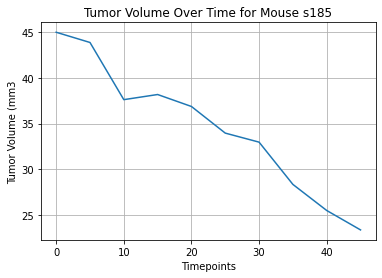

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin.
# The first mouse treated with Capomulin up top: s185

# Done via pandas: Get data for mouse s185:
s185_data = merged_data[merged_data["Mouse ID"] == "s185"]
s185_data = s185_data.set_index("Timepoint")
s185_volume = pd.DataFrame(s185_data["Tumor Volume (mm3)"])

# Show:
s185_volume.plot(grid = True, legend = False)

#Formatting:
plt.title("Tumor Volume Over Time for Mouse s185")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3")
plt.show()

# Done via pylplot  Get data for mouse s185:  (Save for later; is 4 lines longer):
#s185_data = merged_data[merged_data["Mouse ID"] == "s185"]
#s185_data
# Get time and volume numbers to plot:
#s185_times = s185_data["Timepoint"]
#s185_vols = s185_data["Tumor Volume (mm3)"]
# Formatting:
#plt.plot(s185_times, s185_vols)
#plt.title("Tumor Volume Over Time for Mouse s185")
#plt.xlabel("Timepoints")
#plt.ylabel("Tumor Volume (mm3)")
#plt.xlim(-2, 50)
#plt.ylim(20, 50)
#plt.grid(True)
#plt.show()      

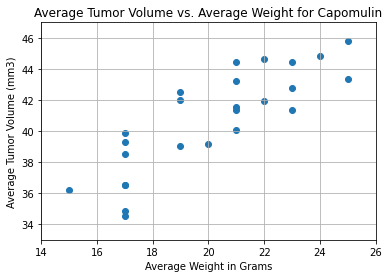

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen.

# Get data for just Capomulin:
capomulin_df = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
capomulin_df.head()

# Get averages for weight and Tumor Volume:
capomulin_groups = capomulin_df.groupby("Mouse ID")
weight_avg = capomulin_groups["Weight (g)"].mean()
tumor_avg = capomulin_groups["Tumor Volume (mm3)"].mean()

# Plot and formatting:
plt.scatter(weight_avg, tumor_avg)
plt.title("Average Tumor Volume vs. Average Weight for Capomulin")
plt.xlabel("Average Weight in Grams")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(14, 26)
plt.ylim(33, 47)
plt.grid(True)
plt.show()

##  Correlation and Regression

 The correlation coefficient between weight and tumor volume is 0.84
 The r-squared is: 0.7088568047708717


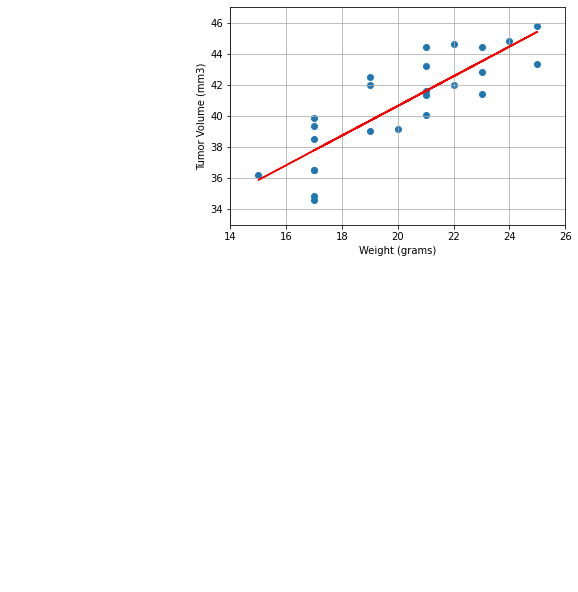

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.

# Add the linear regression equation and line to plot:
# From Class 7:
x_values = weight_avg
y_values = tumor_avg
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (grams)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(14, 26)
plt.ylim(33, 47)
print(f" The correlation coefficient between weight and tumor volume is {round(st.pearsonr(weight_avg, tumor_avg)[0],2)}")
print(f" The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

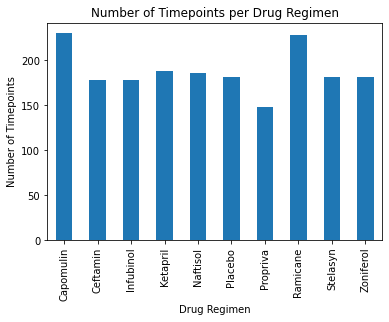

In [32]:
# Additional plot for observations, showing number of timepoints per drug regimen:

survivor_count = pd.DataFrame(merged_data.groupby(["Drug Regimen"])["Timepoint"].count())
#survivor_count
survivor_plot = survivor_count.plot.bar(title="Number of Timepoints per Drug Regimen", legend=False)
survivor_plot.set_xlabel("Drug Regimen")
survivor_plot.set_ylabel("Number of Timepoints")
plt.show()